# Purpose

Of this notebook is to demonstrate some common usages of the `kulgap` package.

### Define a Collection

A collection is essentially is list of all of your timeseries data structured like:

In [1]:
import numpy as np

# import some data
control_obs_times = np.array([0, 4, 7, 11, 14, 18, 21])
control_obs_seqs = np.array(
    [
        [186.98, 368.7, 488.45, 782.15, 924.55, 970.16, 1081.03],
        [267.6, 495.77, 628.39, 892.86, 984.88, 1096.8, 1314.03],
        [164.48, 265.19, 321.11, 429.37, 554.81, 602.29, 801.5],
        [201.21, 363.26, 443.48,660, 860.98, 961.62, 1005.79]
    ]
)

treatment_obs_times = np.array([0, 4, 7, 11, 14, 18, 21])
treatment_obs_seqs = np.array(
    [
        [118.82, 296.3, 465.59, 600.2, 482.71, 613.6, 408.73],
        [151.67, 264.68, 384.61, 370.35, 304.5, 311.43, 213.42],
        [127.3, 211.11, 270.17, 166.8, 87.16, 72.28, 54.18]
    ]
)

`control_obs_times` is the sequence of times at which measurements were taken for the control case. `control_obs_seqs` is the sequence**s** of the actual measurements taken at each individual time.

In [2]:
from kulgap.collection import Collection

control_collection = Collection("control", control_obs_times, control_obs_seqs)
treatment_collection = Collection("treatment", treatment_obs_times, treatment_obs_seqs)

INFO:kulgap.config:Normalizing data...
INFO:kulgap.config:Normalizing data...


### Calculate Metrics for the Collection

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

These are the supported metric types:

In [4]:
from kulgap.metrics import Metrics
Metrics.TYPES

('KL_DIVERGENCE',
 'KL_P_VALUE',
 'MRECIST',
 'MRECIST_COUNTS',
 'ANGLE',
 'ANGLE_RELATIVE',
 'ANGLE_AVERAGE',
 'ANGLE_AVERAGE_RELATIVE',
 'AUC',
 'AUC_NORM',
 'AUC_GP',
 'DIRECTION',
 'CREDIBLE_INTERVALS',
 'PERCENT_CREDIBLE_INTERVALS',
 'RATES_LIST',
 'DELTA_LOG_LIKELIHOOD_H0_H1')

You need to pass into the Metrics the Collection on which you'd like to perform analysis on, and you're ready to calculate the metrics.

In [23]:
control_metrics = Metrics(collection=control_collection)
treatment_metrics = Metrics(collection=treatment_collection)

### KL Divergence

The main supported distance metric between two Gaussian processes.

In [24]:
treatment_metrics.kl_divergence(control_metrics)

INFO:kulgap.config:Currently no fit GP on treatment, fitting a GP
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:kulgap.config:Currently no fit GP on control, fitting a GP


Optimization restart 1/7, f = 24.679507527412888
Optimization restart 2/7, f = 24.679507527118744
Optimization restart 3/7, f = 24.679507527180185
Optimization restart 4/7, f = 24.679507527214284
Optimization restart 5/7, f = 32.57611537622304
Optimization restart 6/7, f = 24.679507527592577
Optimization restart 7/7, f = 32.57611537622234


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = -9.145489191420284
Optimization restart 2/7, f = -9.145489191455582
Optimization restart 3/7, f = 6.877801178677256
Optimization restart 4/7, f = -9.145489191148718
Optimization restart 5/7, f = 6.877800484791438
Optimization restart 6/7, f = 6.877801178671929


INFO:kulgap.config:Calculating the KL Divergence between treatment and control
INFO:kulgap.config:Calculated KL divergence is: 28.260212


Optimization restart 7/7, f = -9.145489191406373


28.2602121290738

 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


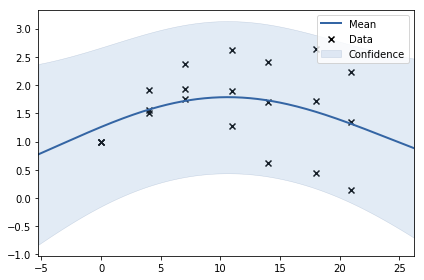

In [25]:
treatment_metrics.fit_gp.plot()

In [26]:
control_metrics.kl_divergence(treatment_metrics)

INFO:kulgap.config:Calculating the KL Divergence between control and treatment
INFO:kulgap.config:Calculated KL divergence is: 468.149878


468.1498784372714

Of course, KL divergence is not symmetric.

 /usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


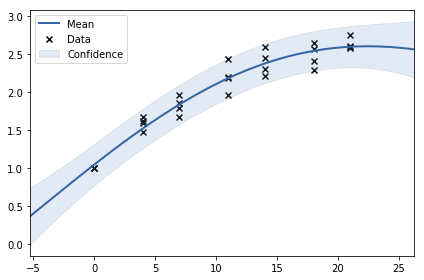

In [27]:
control_metrics.fit_gp.plot()

### Jensen Shannon Divergence

The symmetric version of KL divergence.

### P value for the observed KL divergence

In [28]:
treatment_metrics.kl_p_value(control_metrics)

INFO:kulgap.config:Processed 0 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.583690003298415
Optimization restart 2/7, f = 41.70602248293774
Optimization restart 3/7, f = 32.58369000750814
Optimization restart 4/7, f = 32.58369000329053
Optimization restart 5/7, f = 41.706022482913525
Optimization restart 6/7, f = 32.583690003290826


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 32.58369000328993
Optimization restart 1/7, f = -10.192852172568353
Optimization restart 2/7, f = -10.192852184306595
Optimization restart 3/7, f = -10.192852184315825
Optimization restart 4/7, f = 5.931897945310354
Optimization restart 5/7, f = -10.192852184318163
Optimization restart 6/7, f = 5.931897945305995
Optimization restart 7/7, f = -10.192852184292267


 /Users/wonjunetai/src/github.com/kulgap/kulgap/metrics.py:159: RuntimeWarning:invalid value encountered in log10
 /usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
INFO:kulgap.config:Processed 1 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.146051935022765
Optimization restart 2/7, f = 31.14605193571953
Optimization restart 3/7, f = 40.34498020701457
Optimization restart 4/7, f = 31.146051936978314
Optimization restart 5/7, f = 40.34498020600504
Optimization restart 6/7, f = 31.146051939699163


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 40.34498020712625
Optimization restart 1/7, f = -3.0575608927735924
Optimization restart 2/7, f = 12.635856868326021
Optimization restart 3/7, f = 12.635856868332445
Optimization restart 4/7, f = -3.057560898679842
Optimization restart 5/7, f = 12.6358568671298
Optimization restart 6/7, f = -3.0575608986720866
Optimization restart 7/7, f = 12.635856868447103


INFO:kulgap.config:Processed 2 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 30.715772533242173
Optimization restart 2/7, f = 30.715772533216693
Optimization restart 3/7, f = 40.00800319608033
Optimization restart 4/7, f = 30.715772534247794
Optimization restart 5/7, f = 30.71577253706323


 /usr/local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:51: RuntimeWarning:overflow encountered in square
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 30.715772533214643
Optimization restart 7/7, f = 30.71577253330378
Optimization restart 1/7, f = -9.284332883570613
Optimization restart 2/7, f = -9.284332883702286
Optimization restart 3/7, f = 6.903400260240083
Optimization restart 4/7, f = 6.903400260111319


INFO:kulgap.config:Processed 3 out of 70 cases


Optimization restart 5/7, f = 6.903400260086496
Optimization restart 6/7, f = 6.903400259959266
Optimization restart 7/7, f = 6.903400259986192


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.60350166428249
Optimization restart 2/7, f = 40.834117421510115
Optimization restart 3/7, f = 40.83412193444006
Optimization restart 4/7, f = 31.603501654929595
Optimization restart 5/7, f = 31.603501655057997
Optimization restart 6/7, f = 32.399585388882585


 /usr/local/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /usr/local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:54: RuntimeWarning:invalid value encountered in multiply
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 40.834121934423806
Optimization restart 1/7, f = -2.529952137309845
Optimization restart 2/7, f = -2.529952137321203
Optimization restart 3/7, f = 12.711477282781642
Optimization restart 4/7, f = -2.5299521372893654
Optimization restart 5/7, f = -2.529952137122649


INFO:kulgap.config:Processed 4 out of 70 cases


Optimization restart 6/7, f = -2.5299521368750355
Optimization restart 7/7, f = -2.529952137203029


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 15.6524206157811
Optimization restart 2/7, f = 15.652420616743825
Optimization restart 3/7, f = 15.652420615729916
Optimization restart 4/7, f = 15.652420615793826
Optimization restart 5/7, f = 15.652420616007952
Optimization restart 6/7, f = 28.17682734437186


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 15.652420615730335
Optimization restart 1/7, f = 25.412401326574646
Optimization restart 2/7, f = 34.16374257748357
Optimization restart 3/7, f = 34.16374257748243
Optimization restart 4/7, f = 34.163742438287535
Optimization restart 5/7, f = 25.412401326586995
Optimization restart 6/7, f = 34.16374230843195
Optimization restart 7/7, f = 25.412401326859868


INFO:kulgap.config:Processed 5 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 16.24612817156763
Optimization restart 2/7, f = 28.80834957943771
Optimization restart 3/7, f = 28.808349579365743
Optimization restart 4/7, f = 16.24612817154064
Optimization restart 5/7, f = 28.808349578716268
Optimization restart 6/7, f = 28.808349579365174
Optimization restart 7/7, f = 28.808349579395813
Optimization restart 1/7, f = 25.928570871587866
Optimization restart 2/7, f = 25.928570874077476
Optimization restart 3/7, f = 25.928570875518005
Optimization restart 4/7, f = 34.58094970177959
Optimization restart 5/7, f = 34.58094540708116
Optimization restart 6/7, f = 34.580949172221835
Optimization restart 7/7, f = 34.58094970175409


INFO:kulgap.config:Processed 6 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 16.004540969281166
Optimization restart 2/7, f = 28.634085824005908
Optimization restart 3/7, f = 16.004540969230284
Optimization restart 4/7, f = 16.00454096923044
Optimization restart 5/7, f = 28.634085824045883
Optimization restart 6/7, f = 28.6340858239763


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 16.004540969244328
Optimization restart 1/7, f = 24.982910518069804
Optimization restart 2/7, f = 24.98291051621672
Optimization restart 3/7, f = 24.982910517308085
Optimization restart 4/7, f = 33.783667400809314
Optimization restart 5/7, f = 24.982910516247482
Optimization restart 6/7, f = 33.78366740219292
Optimization restart 7/7, f = 24.982910516364107


INFO:kulgap.config:Processed 7 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 14.216218438430253
Optimization restart 2/7, f = 14.21621843845955
Optimization restart 3/7, f = 14.216218438441256
Optimization restart 4/7, f = 14.216218439882999
Optimization restart 5/7, f = 14.216218438436497


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 14.216218439013637
Optimization restart 7/7, f = 14.216218438816895
Optimization restart 1/7, f = 27.160118289335095
Optimization restart 2/7, f = 27.160118289563155
Optimization restart 3/7, f = 27.16011828921629
Optimization restart 4/7, f = 35.6218440645351
Optimization restart 5/7, f = 35.621841988826446
Optimization restart 6/7, f = 35.62184406433954


INFO:kulgap.config:Processed 8 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 27.256506103506574
Optimization restart 1/7, f = 14.408355454013199
Optimization restart 2/7, f = 27.111349994173473
Optimization restart 3/7, f = 14.408355454010138
Optimization restart 4/7, f = 14.408355454003729
Optimization restart 5/7, f = 14.408355454018983
Optimization restart 6/7, f = 14.408355454437855


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 14.408355454012048
Optimization restart 1/7, f = 26.427504197529558
Optimization restart 2/7, f = 34.99467083103793
Optimization restart 3/7, f = 26.427504197162865
Optimization restart 4/7, f = 34.99467083093184
Optimization restart 5/7, f = 26.427504197205206
Optimization restart 6/7, f = 26.42750419713343
Optimization restart 7/7, f = 34.994670830896524


INFO:kulgap.config:Processed 9 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 14.788928386461095
Optimization restart 2/7, f = 14.788928386580537
Optimization restart 3/7, f = 14.788928388670671
Optimization restart 4/7, f = 27.560527417672482
Optimization restart 5/7, f = 14.7889283865955
Optimization restart 6/7, f = 14.788928386549932


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 27.56052741796897
Optimization restart 1/7, f = 26.842848645541732
Optimization restart 2/7, f = 35.32929161082728
Optimization restart 3/7, f = 35.32930503267748
Optimization restart 4/7, f = 26.842848645713715
Optimization restart 5/7, f = 26.84284864565727
Optimization restart 6/7, f = 35.329304998042645
Optimization restart 7/7, f = 26.842848645535685


INFO:kulgap.config:Processed 10 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 33.48205410678726
Optimization restart 2/7, f = 33.28023626564463
Optimization restart 3/7, f = 33.28023626564524


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 33.28023626564641
Optimization restart 5/7, f = 42.79329788238667
Optimization restart 6/7, f = 42.79329788240909
Optimization restart 7/7, f = 33.28023626569143
Optimization restart 1/7, f = 11.193059767197084
Optimization restart 2/7, f = 23.744669648307735
Optimization restart 3/7, f = 11.193059767218942


INFO:kulgap.config:Processed 11 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 23.74466964831337
Optimization restart 5/7, f = 11.19305976716321
Optimization restart 6/7, f = 11.193059767215292
Optimization restart 7/7, f = 23.744669648285992
Optimization restart 1/7, f = 33.09660331263443
Optimization restart 2/7, f = 33.09660331276568
Optimization restart 3/7, f = 42.661362403648944


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 42.661361447013554
Optimization restart 5/7, f = 33.09660331299985
Optimization restart 6/7, f = 42.66136240356546
Optimization restart 7/7, f = 42.6613624035876
Optimization restart 1/7, f = 11.65359158069425
Optimization restart 2/7, f = 24.052297087367677
Optimization restart 3/7, f = 11.653591580649937
Optimization restart 4/7, f = 24.05229710894227


INFO:kulgap.config:Processed 12 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 11.653591580676368
Optimization restart 6/7, f = 24.052297108966144
Optimization restart 7/7, f = 11.653591580674771
Optimization restart 1/7, f = 33.53450418828419
Optimization restart 2/7, f = 33.534504188280906
Optimization restart 3/7, f = 43.083986659807515
Optimization restart 4/7, f = 43.08398665982576
Optimization restart 5/7, f = 33.534504188396795
Optimization restart 6/7, f = 43.083986659829904
Optimization restart 7/7, f = 33.5345041885113


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 10.3508683097438
Optimization restart 2/7, f = 10.350868309384406
Optimization restart 3/7, f = 10.350868310036779
Optimization restart 4/7, f = 10.350868309418296
Optimization restart 5/7, f = 22.934603129224392
Optimization restart 6/7, f = 10.35086830963674
Optimization restart 7/7, f = 10.350868309385547


INFO:kulgap.config:Processed 13 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.978831017648204
Optimization restart 2/7, f = 41.6155912784906
Optimization restart 3/7, f = 31.978831013510412
Optimization restart 4/7, f = 31.97883101364893
Optimization restart 5/7, f = 41.61559127984269
Optimization restart 6/7, f = 41.615591279766534


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 31.97883101350922
Optimization restart 1/7, f = 13.950601448952135
Optimization restart 2/7, f = 13.950601448951552
Optimization restart 3/7, f = 13.950601449523704
Optimization restart 4/7, f = 25.97993675670178
Optimization restart 5/7, f = 13.950601448952547
Optimization restart 6/7, f = 13.950601449595835
Optimization restart 7/7, f = 13.950601449037872


INFO:kulgap.config:Processed 14 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.560127195498126
Optimization restart 2/7, f = 32.56012719582676
Optimization restart 3/7, f = 32.560127195706876


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 42.16354731887194
Optimization restart 5/7, f = 42.16354701201577
Optimization restart 6/7, f = 42.16354732286954
Optimization restart 7/7, f = 32.56012719550765
Optimization restart 1/7, f = 13.44641909672205
Optimization restart 2/7, f = 13.44641909618214
Optimization restart 3/7, f = 13.446419096190493
Optimization restart 4/7, f = 25.521396037070623
Optimization restart 5/7, f = 13.44641909953656
Optimization restart 6/7, f = 13.446419096978962
Optimization restart 7/7, f = 13.446419096422826


INFO:kulgap.config:Processed 15 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.30145234435734
Optimization restart 2/7, f = 32.30145234437103
Optimization restart 3/7, f = 41.96930855784364
Optimization restart 4/7, f = 32.301452345416415


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 32.30145234592261
Optimization restart 6/7, f = 41.969306938388186
Optimization restart 7/7, f = 32.301452344339616
Optimization restart 1/7, f = 13.527199866675458
Optimization restart 2/7, f = 13.527199866886523
Optimization restart 3/7, f = 13.527199866674955
Optimization restart 4/7, f = 25.53409061032508
Optimization restart 5/7, f = 25.534078362309593
Optimization restart 6/7, f = 13.52719986667678
Optimization restart 7/7, f = 25.53409049329062


INFO:kulgap.config:Processed 16 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 2.27399106604674
Optimization restart 2/7, f = 2.273991066048099
Optimization restart 3/7, f = 16.970411028286794
Optimization restart 4/7, f = 16.970421584264336
Optimization restart 5/7, f = 2.2739910660481506


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 2.273991066047042
Optimization restart 7/7, f = 16.970421592370577
Optimization restart 1/7, f = 24.0104511155673
Optimization restart 2/7, f = 24.010451115601974
Optimization restart 3/7, f = 24.010451116087417


INFO:kulgap.config:Processed 17 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 23.630759123260205
Optimization restart 5/7, f = 32.32694424432368
Optimization restart 6/7, f = 32.32694424455077
Optimization restart 7/7, f = 24.010451115449634
Optimization restart 1/7, f = 26.594516000077213


 /usr/local/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 2/7, f = -2.29789044593506
Optimization restart 3/7, f = -2.297890446033522
Optimization restart 4/7, f = -2.297890446033609
Optimization restart 5/7, f = 12.955369570349767
Optimization restart 6/7, f = -2.297890446027388
Optimization restart 7/7, f = 12.955369563549224
Optimization restart 1/7, f = 22.05973465890687
Optimization restart 2/7, f = 22.059699125516616
Optimization restart 3/7, f = 31.041076239465156
Optimization restart 4/7, f = 31.0410781281066
Optimization restart 5/7, f = 31.041078041127776


INFO:kulgap.config:Processed 18 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 31.041072605319325
Optimization restart 7/7, f = 22.059749953049202
Optimization restart 1/7, f = 26.820975807867356
Optimization restart 2/7, f = 2.0742507798420196
Optimization restart 3/7, f = 17.11812084867004


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 17.118120848670266
Optimization restart 5/7, f = 17.118120272638272
Optimization restart 6/7, f = 17.118120848669655
Optimization restart 7/7, f = 17.11812084855189
Optimization restart 1/7, f = 23.40378196770432
Optimization restart 2/7, f = 23.011389434097012
Optimization restart 3/7, f = 23.40378200982059
Optimization restart 4/7, f = 31.736372983172117
Optimization restart 5/7, f = 23.011402893184115
Optimization restart 6/7, f = 23.403781967706944


INFO:kulgap.config:Processed 19 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 23.40378196770399
Optimization restart 1/7, f = 25.618949348503502
Optimization restart 2/7, f = 0.5903924785985168
Optimization restart 3/7, f = 15.604831902794864
Optimization restart 4/7, f = 0.5903924785889849
Optimization restart 5/7, f = 15.604832055673784


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 15.604832057295658
Optimization restart 7/7, f = 15.604832056900616
Optimization restart 1/7, f = 25.355502603213047
Optimization restart 2/7, f = 25.00740179127639
Optimization restart 3/7, f = 25.355502602017673
Optimization restart 4/7, f = 33.45321764481528
Optimization restart 5/7, f = 25.35550260321193
Optimization restart 6/7, f = 25.35550260196005
Optimization restart 7/7, f = 25.00724188325451


INFO:kulgap.config:Processed 20 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method


Optimization restart 1/7, f = 31.999184554405943
Optimization restart 2/7, f = 31.59045515230313
Optimization restart 3/7, f = 41.031151091804745
Optimization restart 4/7, f = 41.03115109180541
Optimization restart 5/7, f = 41.031151091814024
Optimization restart 6/7, f = 31.590455152460564
Optimization restart 7/7, f = 41.031151091804844


INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 4.506678260413855
Optimization restart 2/7, f = 18.65804502744731
Optimization restart 3/7, f = 18.658045026685315
Optimization restart 4/7, f = 4.506678260299731
Optimization restart 5/7, f = 4.5066782603034135
Optimization restart 6/7, f = 18.658045027452545
Optimization restart 7/7, f = 18.65804502263441


INFO:kulgap.config:Processed 21 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.103071809975695
Optimization restart 2/7, f = 40.64266880004102
Optimization restart 3/7, f = 31.10307185157674
Optimization restart 4/7, f = 31.10307180930134
Optimization restart 5/7, f = 40.642668800166646
Optimization restart 6/7, f = 40.64266878868074


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 31.1030718093563
Optimization restart 1/7, f = 1.3680555027129078
Optimization restart 2/7, f = 1.3680555027131192
Optimization restart 3/7, f = 15.758336116630415
Optimization restart 4/7, f = 15.758336211173518
Optimization restart 5/7, f = 15.758336211176104


INFO:kulgap.config:Processed 22 out of 70 cases


Optimization restart 6/7, f = 1.3680555039416298
Optimization restart 7/7, f = 15.758336211290032


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.997859371056943
Optimization restart 2/7, f = 31.997859370262383
Optimization restart 3/7, f = 31.997859370283933


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 4/7, f = 31.99785937026482
Optimization restart 5/7, f = 41.45685539371762
Optimization restart 6/7, f = 31.99785937075643
Optimization restart 7/7, f = 31.99785937028236
Optimization restart 1/7, f = 4.347971944869652
Optimization restart 2/7, f = 4.347971944875015
Optimization restart 3/7, f = 18.212785853480526


INFO:kulgap.config:Processed 23 out of 70 cases

Optimization restart 4/7, f = 18.212788316642417
Optimization restart 5/7, f = 18.212788315972233
Optimization restart 6/7, f = 18.21278828174566
Optimization restart 7/7, f = 4.347971944947897



INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 29.279787166338807
Optimization restart 2/7, f = 38.986776419420245
Optimization restart 3/7, f = 29.279787164478577
Optimization restart 4/7, f = 38.98677643388043
Optimization restart 5/7, f = 29.27978716489972
Optimization restart 6/7, f = 38.986776433881744


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 29.279787164233884
Optimization restart 1/7, f = 0.9710370924169407
Optimization restart 2/7, f = 15.68429414200459
Optimization restart 3/7, f = 0.9710370924140843
Optimization restart 4/7, f = 0.9710370924195715
Optimization restart 5/7, f = 0.9710370924737273
Optimization restart 6/7, f = 15.684294138743034
Optimization restart 7/7, f = 0.9710370924375624


INFO:kulgap.config:Processed 24 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 30.415675728097607
Optimization restart 2/7, f = 30.415675727369425
Optimization restart 3/7, f = 40.014258464571284
Optimization restart 4/7, f = 30.415675727373774
Optimization restart 5/7, f = 30.415675727405702
Optimization restart 6/7, f = 30.415675733868476


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 30.415675727369507
Optimization restart 1/7, f = 5.55091214469153
Optimization restart 2/7, f = 5.550912144557907
Optimization restart 3/7, f = 19.454167066723308
Optimization restart 4/7, f = 5.55091214455835
Optimization restart 5/7, f = 5.550912144562567
Optimization restart 6/7, f = 19.45416706690989

INFO:kulgap.config:Processed 25 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 7/7, f = 5.550912144557673
Optimization restart 1/7, f = 29.809935429852665
Optimization restart 2/7, f = 39.52942028330439
Optimization restart 3/7, f = 39.529420704644906
Optimization restart 4/7, f = 29.809935428936072


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 29.809935428961676
Optimization restart 6/7, f = 29.80993546459585
Optimization restart 7/7, f = 29.80993542893791
Optimization restart 1/7, f = 1.5788069268100102
Optimization restart 2/7, f = 1.5788069268201053
Optimization restart 3/7, f = 1.5788069271242584
Optimization restart 4/7, f = 15.798410018086647
Optimization restart 5/7, f = 15.798410044378404
Optimization restart 6/7, f = 15.798410044523893
Optimization restart 7/7, f = 1.5788069268341722


INFO:kulgap.config:Processed 26 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 13.415989278716705
Optimization restart 2/7, f = 13.415989278305538
Optimization restart 3/7, f = 13.415989278304057
Optimization restart 4/7, f = 26.647415991255883
Optimization restart 5/7, f = 26.64741597985264


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 13.41598927831483
Optimization restart 7/7, f = 13.41598927853287
Optimization restart 1/7, f = 27.077620237493917
Optimization restart 2/7, f = 35.28276341685423
Optimization restart 3/7, f = 35.28276341689579
Optimization restart 4/7, f = 35.28276341685408
Optimization restart 5/7, f = 27.07762024003806
Optimization restart 6/7, f = 35.2827634168542


INFO:kulgap.config:Processed 27 out of 70 cases
INFO:GP:initializing Y


Optimization restart 7/7, f = 26.9731497616839


INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 13.73549987040289
Optimization restart 2/7, f = 26.988030978300962
Optimization restart 3/7, f = 13.735499870386704
Optimization restart 4/7, f = 26.98803097852658
Optimization restart 5/7, f = 26.98803097829802
Optimization restart 6/7, f = 26.9880309470985
Optimization restart 7/7, f = 13.735499870373129
Optimization restart 1/7, f = 26.197571525882857
Optimization restart 2/7, f = 26.197526413897624
Optimization restart 3/7, f = 26.197528087097144
Optimization restart 4/7, f = 26.197522819171134
Optimization restart 5/7, f = 34.659843075394775
Optimization restart 6/7, f = 34.659843072025


INFO:kulgap.config:Processed 28 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 26.197522230942155


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 26.03888660241019
Optimization restart 2/7, f = 13.88405820326749
Optimization restart 3/7, f = 27.177242553109103
Optimization restart 4/7, f = 27.177242553049417
Optimization restart 5/7, f = 27.17724255304993
Optimization restart 6/7, f = 27.177242552428005
Optimization restart 7/7, f = 27.177242553042753
Optimization restart 1/7, f = 26.75339916534636
Optimization restart 2/7, f = 34.943989779513785
Optimization restart 3/7, f = 34.94398776429232
Optimization restart 4/7, f = 34.94399043258456
Optimization restart 5/7, f = 34.943990421852156
Optimization restart 6/7, f = 26.75339916480499
Optimization restart 7/7, f = 26.599715088040107


INFO:kulgap.config:Processed 29 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 24.157808674015918
Optimization restart 2/7, f = 11.028545098929023
Optimization restart 3/7, f = 11.028545098730525
Optimization restart 4/7, f = 11.028545098740587
Optimization restart 5/7, f = 24.649229557440197


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 6/7, f = 11.028545098738462
Optimization restart 7/7, f = 24.649229557624498
Optimization restart 1/7, f = 27.800616637876008
Optimization restart 2/7, f = 35.907566823589
Optimization restart 3/7, f = 27.73848733049961
Optimization restart 4/7, f = 27.800616629870675
Optimization restart 5/7, f = 35.907566823597804
Optimization restart 6/7, f = 27.738487332005278
Optimization restart 7/7, f = 27.738487330393262


INFO:kulgap.config:Processed 30 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.992473621145088
Optimization restart 2/7, f = 41.85754377349403
Optimization restart 3/7, f = 41.85754377349191
Optimization restart 4/7, f = 31.992473621030676
Optimization restart 5/7, f = 31.992473622721107
Optimization restart 6/7, f = 31.992473621022313


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 31.9924736212735
Optimization restart 1/7, f = 14.081411180634193
Optimization restart 2/7, f = 14.081411180635337
Optimization restart 3/7, f = 14.081411180632989
Optimization restart 4/7, f = 25.622945015970423
Optimization restart 5/7, f = 14.081411180694468
Optimization restart 6/7, f = 14.08141118070965
Optimization restart 7/7, f = 14.081411180651024


INFO:kulgap.config:Processed 31 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 32.5995901383769
Optimization restart 2/7, f = 42.42187962944288
Optimization restart 3/7, f = 32.59958997599681
Optimization restart 4/7, f = 42.42188240931216
Optimization restart 5/7, f = 42.42188240929349
Optimization restart 6/7, f = 42.42188240931207
Optimization restart 7/7, f = 32.59958997367791
Optimization restart 1/7, f = 13.706365775472497
Optimization restart 2/7, f = 13.706365775460998

INFO:kulgap.config:Processed 32 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 3/7, f = 25.271135349318172
Optimization restart 4/7, f = 13.706365775447411
Optimization restart 5/7, f = 25.271135349339527
Optimization restart 6/7, f = 13.706365775448873
Optimization restart 7/7, f = 25.271135349414703
Optimization restart 1/7, f = 32.2890710275324
Optimization restart 2/7, f = 32.289071027481405
Optimization restart 3/7, f = 42.17083728665828
Optimization restart 4/7, f = 32.28907103424048


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = 42.17083727730094
Optimization restart 6/7, f = 42.17083728668091
Optimization restart 7/7, f = 32.2890710292967
Optimization restart 1/7, f = 13.506746395606793
Optimization restart 2/7, f = 13.506746395601091
Optimization restart 3/7, f = 24.99160170938037
Optimization restart 4/7, f = 13.506746395623635
Optimization restart 5/7, f = 13.506746395609696
Optimization restart 6/7, f = 13.506746395892947
Optimization restart 7/7, f = 13.50674639559686


INFO:kulgap.config:Processed 33 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 1/7, f = 31.018257916537046
Optimization restart 2/7, f = 41.02783928766334
Optimization restart 3/7, f = 41.027839293918326
Optimization restart 4/7, f = 31.018257839192827
Optimization restart 5/7, f = 41.02783929392395
Optimization restart 6/7, f = 31.018257838023615


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 7/7, f = 31.01825783825867
Optimization restart 1/7, f = 15.16224145728873
Optimization restart 2/7, f = 26.53011356441332
Optimization restart 3/7, f = 15.162241457288662
Optimization restart 4/7, f = 26.53011354931739
Optimization restart 5/7, f = 15.162241457325388
Optimization restart 6/7, f = 15.162241457315268
Optimization restart 7/7, f = 15.162241457357897

INFO:kulgap.config:Processed 34 out of 70 cases
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters



Optimization restart 1/7, f = -9.14548919146841
Optimization restart 2/7, f = 6.877801178671881
Optimization restart 3/7, f = 6.877801178671739
Optimization restart 4/7, f = -9.145489191442469


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Optimization restart 5/7, f = -9.145489191198308
Optimization restart 6/7, f = 6.877801178659448
Optimization restart 7/7, f = -9.145489191448407
Optimization restart 1/7, f = 24.679507543079264
Optimization restart 2/7, f = 32.57611052581556
Optimization restart 3/7, f = 24.679507529663937


INFO:kulgap.config:Calculating the KL Divergence between treatment and control
INFO:kulgap.config:Calculated KL divergence is: 28.260212
INFO:kulgap.config:The calculated p value for treatment is: 0.027778.


Optimization restart 4/7, f = 24.67950752713884
Optimization restart 5/7, f = 24.679507537757992
Optimization restart 6/7, f = 32.576106597476226
Optimization restart 7/7, f = 24.679507527342995


0.027777777777777776

### Angles

A line of best fit, fit using ordinary least squares.

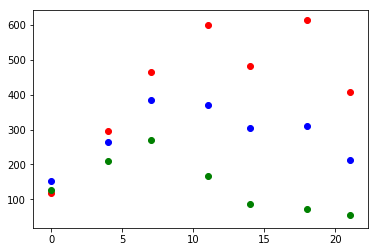

In [12]:
plt.scatter(treatment_obs_times, treatment_obs_seqs[0], c='r')
plt.scatter(treatment_obs_times, treatment_obs_seqs[1], c='b')
plt.scatter(treatment_obs_times, treatment_obs_seqs[2], c='g')

In [29]:
treatment_metrics.angles()

{0: 1.530602146122596, 1: 1.4649906995346866, 2: -0.8546621578435386}

In [30]:
treatment_metrics.average_angle()

1.4804976458365167

### AUC

Area under the curve metric for the GP

In [31]:
treatment_metrics.fit_gp

GP_regression.,value,constraints,priors
rbf.variance,1.5015492964488801,+ve,
rbf.lengthscale,15.81067362783776,+ve,
Gaussian_noise.variance,0.43644712525260204,+ve,


### MRECIST (Modified Response Evaluation Criteria in Solid Tumors)

Because this package was built for comparing tumour growths in patient-derived xenografts, we natively provide this metric.

In [32]:
treatment_metrics.mrecist()

{0: 'mPD', 1: 'mPD', 2: 'mSD'}